In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('titanic_train.csv')
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.65,F G73,S
612,613,1,3,"Murphy, Miss. Margaret Jane",female,NaN,1,0,367230,15.50,NaN,Q
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.00,NaN,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# EDA

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
target_col = 'Survived'
cat_cols = ['Pclass','Sex','Embarked']
num_cols = ['Age','SibSp','Parch','Fare']
drop_cols = ['PassengerId','Name','Ticket','Cabin']

## Univariate analysis

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64


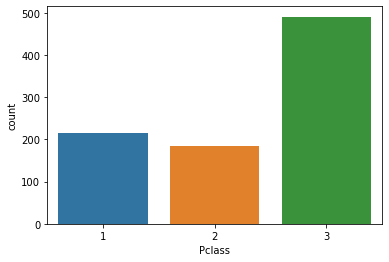

Sex
female    314
male      577
Name: Sex, dtype: int64


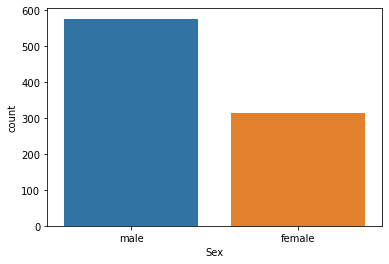

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64


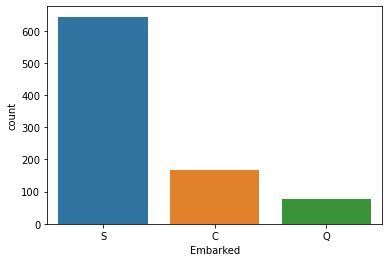

In [7]:
def cat_analyze(col):
    print(col)
    print(df[col].value_counts().sort_index())
    sns.countplot(data = df, x=col)
    plt.show()

for col in cat_cols:
    cat_analyze(col)

Age


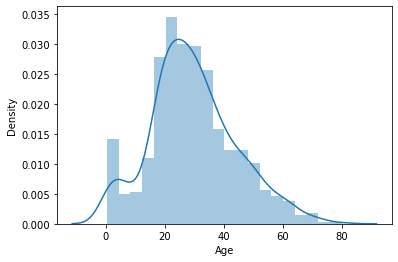

SibSp


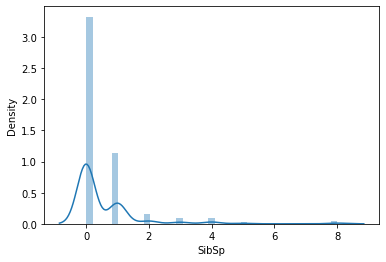

Parch


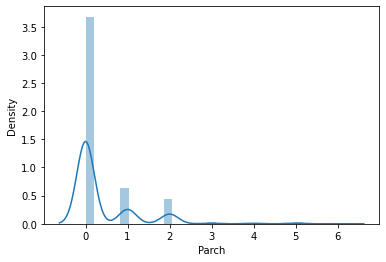

Fare


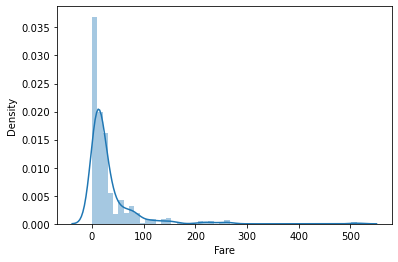

In [8]:
def num_analyze(col):
    print(col)
    sns.distplot(df[col])
    plt.show()

for col in num_cols:
    num_analyze(col)

## Bivariate analysis

Pclass
Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64


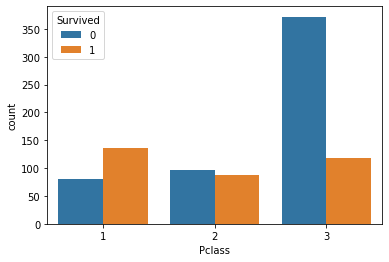

Sex
Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64


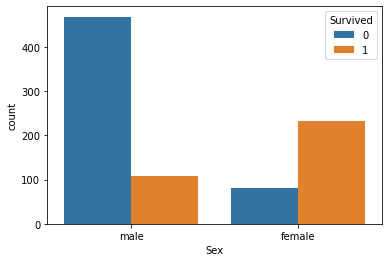

Embarked
Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
Name: Embarked, dtype: int64


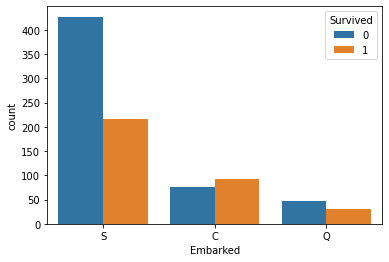

In [9]:
def cat_bivariate(col):
    print(col)
    print(df.groupby(target_col)[col].value_counts().sort_index())
    sns.countplot(data=df,x=col,hue=target_col)
    plt.show()
for col in cat_cols:
    cat_bivariate(col)

Age


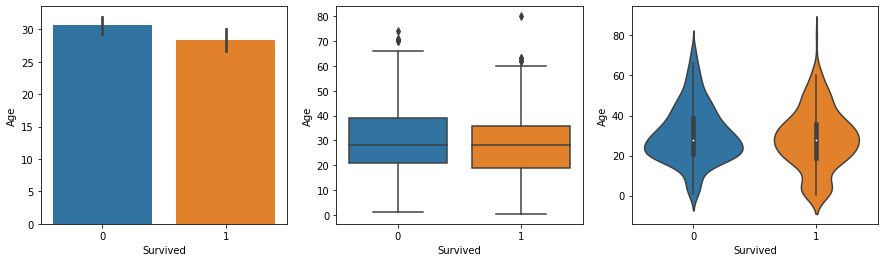

SibSp


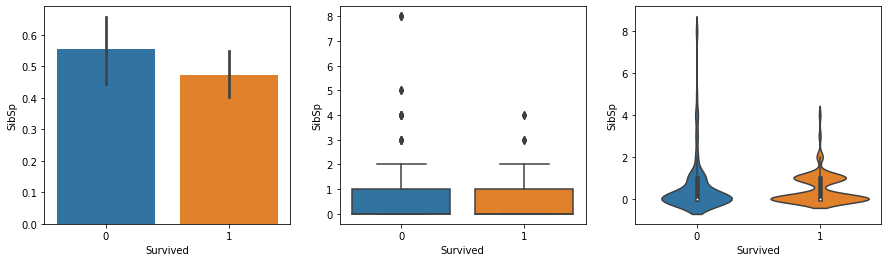

Parch


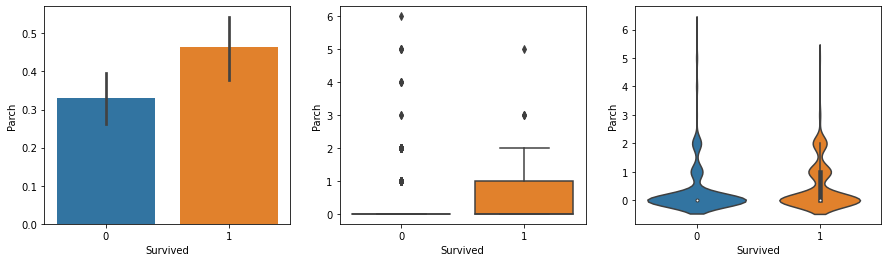

Fare


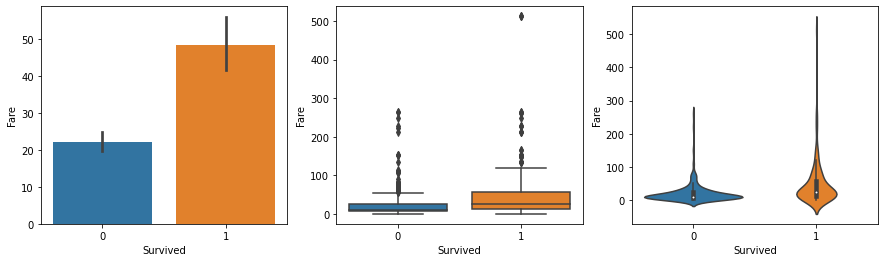

In [10]:
def num_bivariate(col):
    print(col)
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)    
    sns.barplot(data=df,x=target_col,y=col)
    plt.subplot(1,3,2)
    sns.boxplot(data=df,x=target_col, y=col)
    plt.subplot(1,3,3)
    sns.violinplot(data=df,x=target_col, y=col)
    plt.show()
for col in num_cols:
    num_bivariate(col)

<AxesSubplot:>

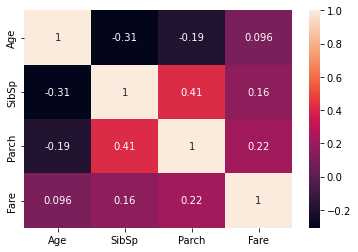

In [11]:
sns.heatmap(df[num_cols].corr(),annot=True)

In [13]:
from random import choice
p_list= ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap']

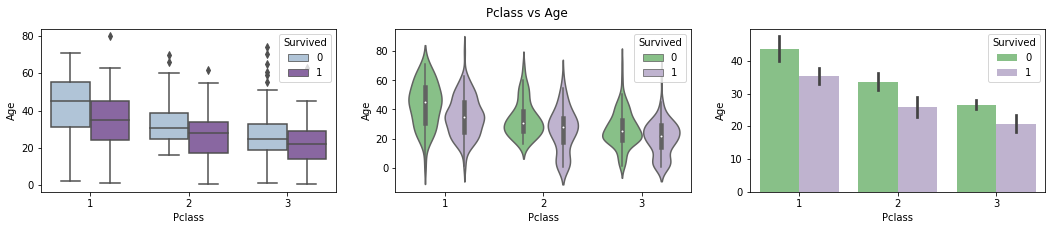

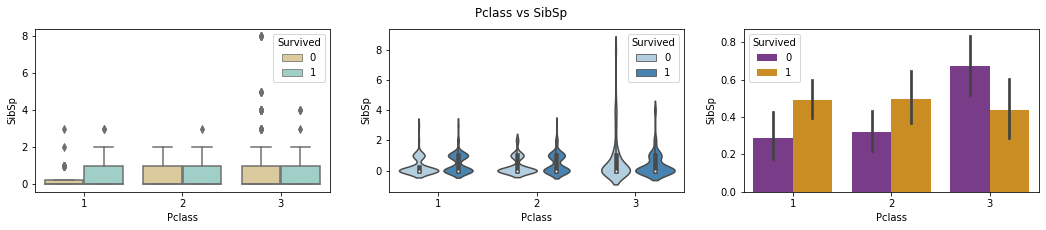

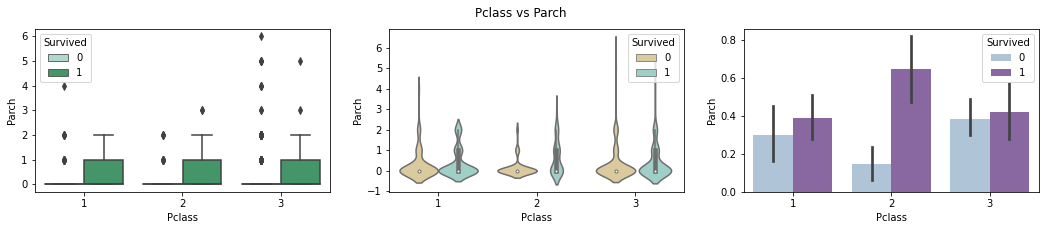

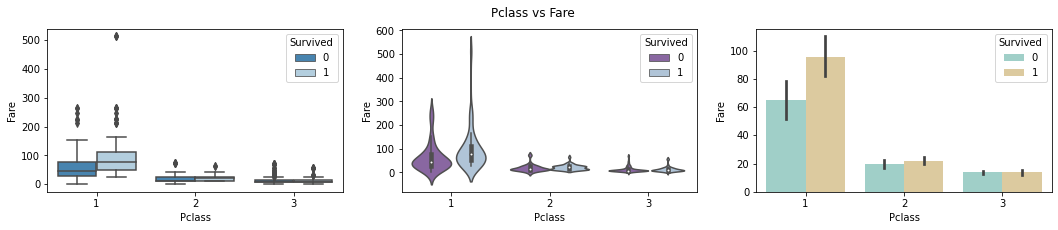

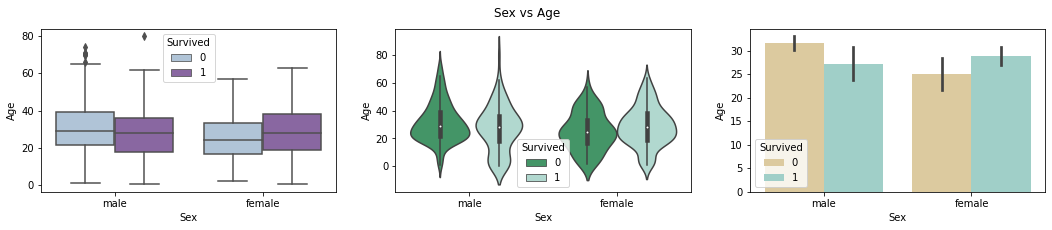

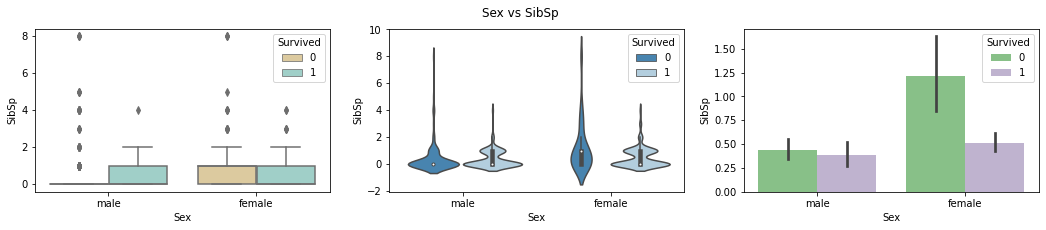

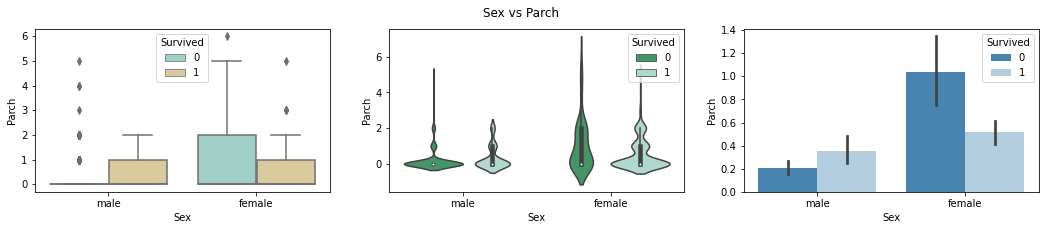

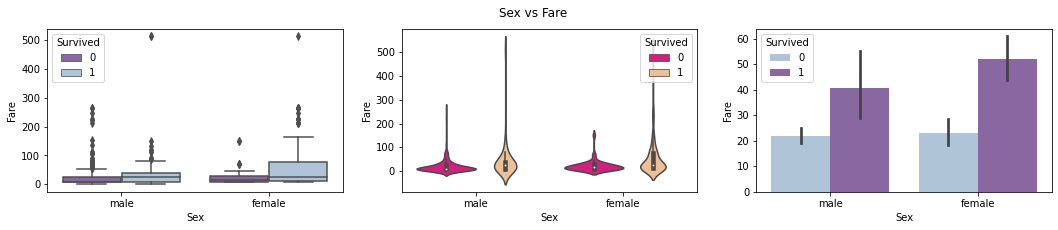

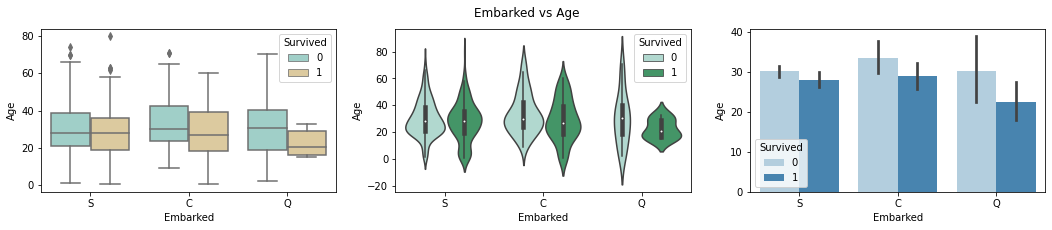

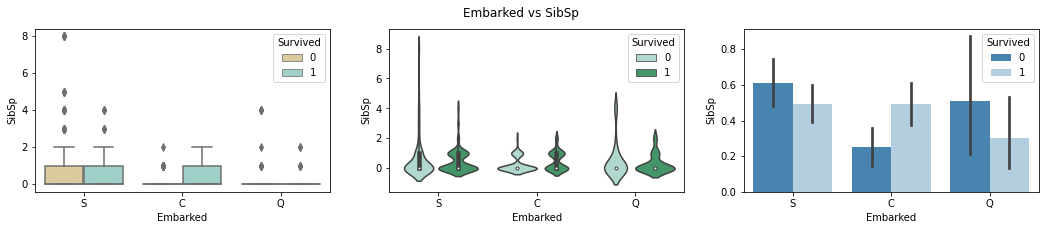

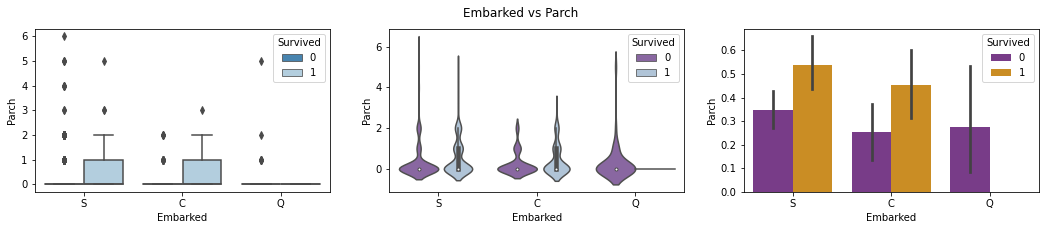

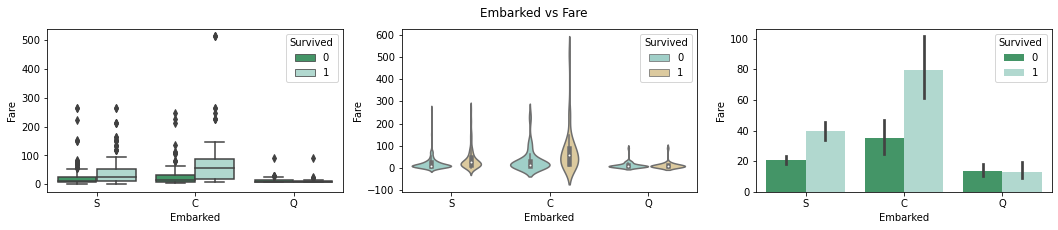

In [14]:
for col in cat_cols:
    if col == target_col:
        continue
    for ncol in num_cols:
        plt.figure(figsize=(18,3))
        plt.suptitle(f'{col} vs {ncol}')
        plt.subplot(1,3,1)
        sns.boxplot(
            data = df, x = col, y = ncol, 
            hue = target_col, palette=choice(p_list))
        plt.subplot(1,3,2)
        sns.violinplot(
            data=df, x = col, y = ncol, 
            hue = target_col, palette=choice(p_list))
        plt.subplot(1,3,3)
        sns.barplot(
            data = df, x = col, y = ncol, 
            hue = target_col, palette=choice(p_list))
        plt.show()

### Missing data

In [15]:
df.drop(drop_cols, axis=1,inplace=True)


In [16]:

# Missing Data Identification
pd.isnull(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False
889,False,False,False,False,False,False,False,False


In [17]:
pd.isnull(df).sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [18]:
100*pd.isnull(df).sum()/len(df)

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

Missing Data Strategy

Identify Missing Data
 Discard the columns having too much of missing data (>25%)
 Treat/Impute the missing entries in columns
 Try to fill fake entries which doesn't impact overall data
   Fill using Mean Values (numerical data)
   Fill using some imputers (categorical data)
Discard the rows having missing entries, if the missing entries are too less (<5%)

<AxesSubplot:>

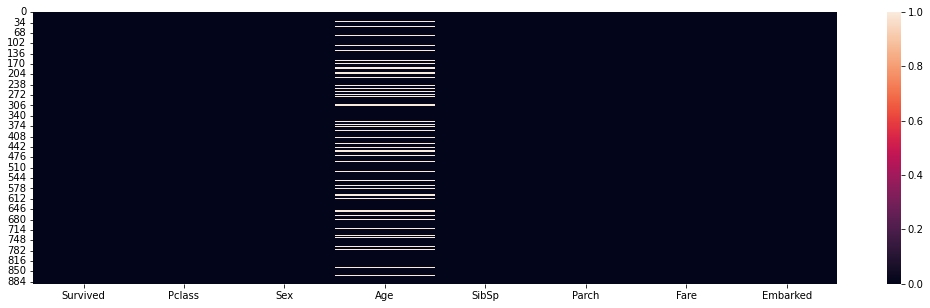

In [19]:
plt.figure(figsize=(18,5))
sns.heatmap(pd.isnull(df))

<AxesSubplot:>

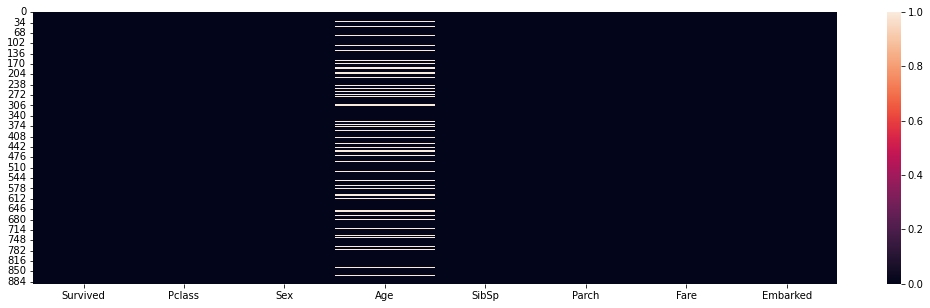

In [20]:
plt.figure(figsize=(18,5))
sns.heatmap(pd.isnull(df))

<AxesSubplot:xlabel='Survived', ylabel='Age'>

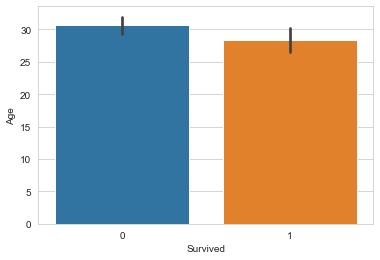

In [21]:
sns.set_style('whitegrid')
sns.barplot(data=df, x='Survived', y='Age')

In [22]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
df['Age'].mean()

29.69911764705882

In [24]:
df['Age'].fillna(0)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     0.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [25]:
df['Age'].fillna(df['Age'].mean()).mean()

29.699117647058763

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

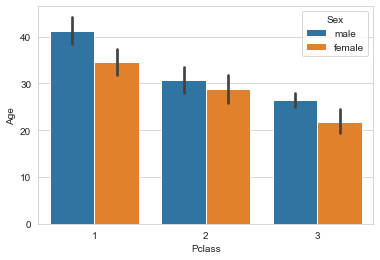

In [26]:
sns.barplot(data=df,y='Age',x='Pclass',hue='Sex')

In [27]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [28]:
# Impute the fake entries in missing Age Information
def age_imputer(data):
    age = data['Age']
    pclass = data['Pclass']
    sex = data['Sex']

    if pd.isnull(age):
        return df['Age'][(df['Pclass']==pclass)&(df['Sex']==sex)].mean()
    else:
        return age

df['Age'] = df.apply(age_imputer, axis = 1)

<AxesSubplot:>

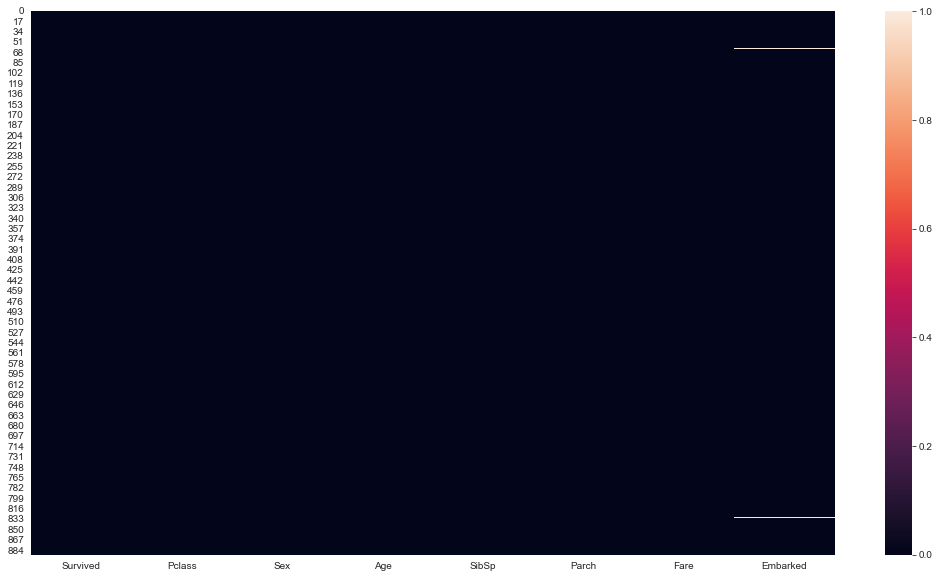

In [29]:
plt.figure(figsize=(18,10))
sns.heatmap(pd.isnull(df))

<AxesSubplot:>

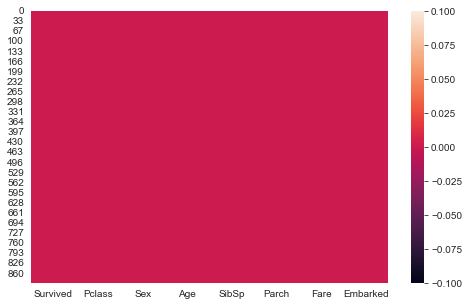

In [30]:
# Dropping missing entries which were very less (in Embarked Column)
df.dropna(inplace=True)
plt.figure(figsize=(8,5))
sns.heatmap(pd.isnull(df))

In [31]:
100*pd.isnull(df).sum()/len(df)

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [32]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### String Data Preprocessing / Creating Dummy for String

In [33]:
data = pd.get_dummies(df).drop('Sex_female',axis=1)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


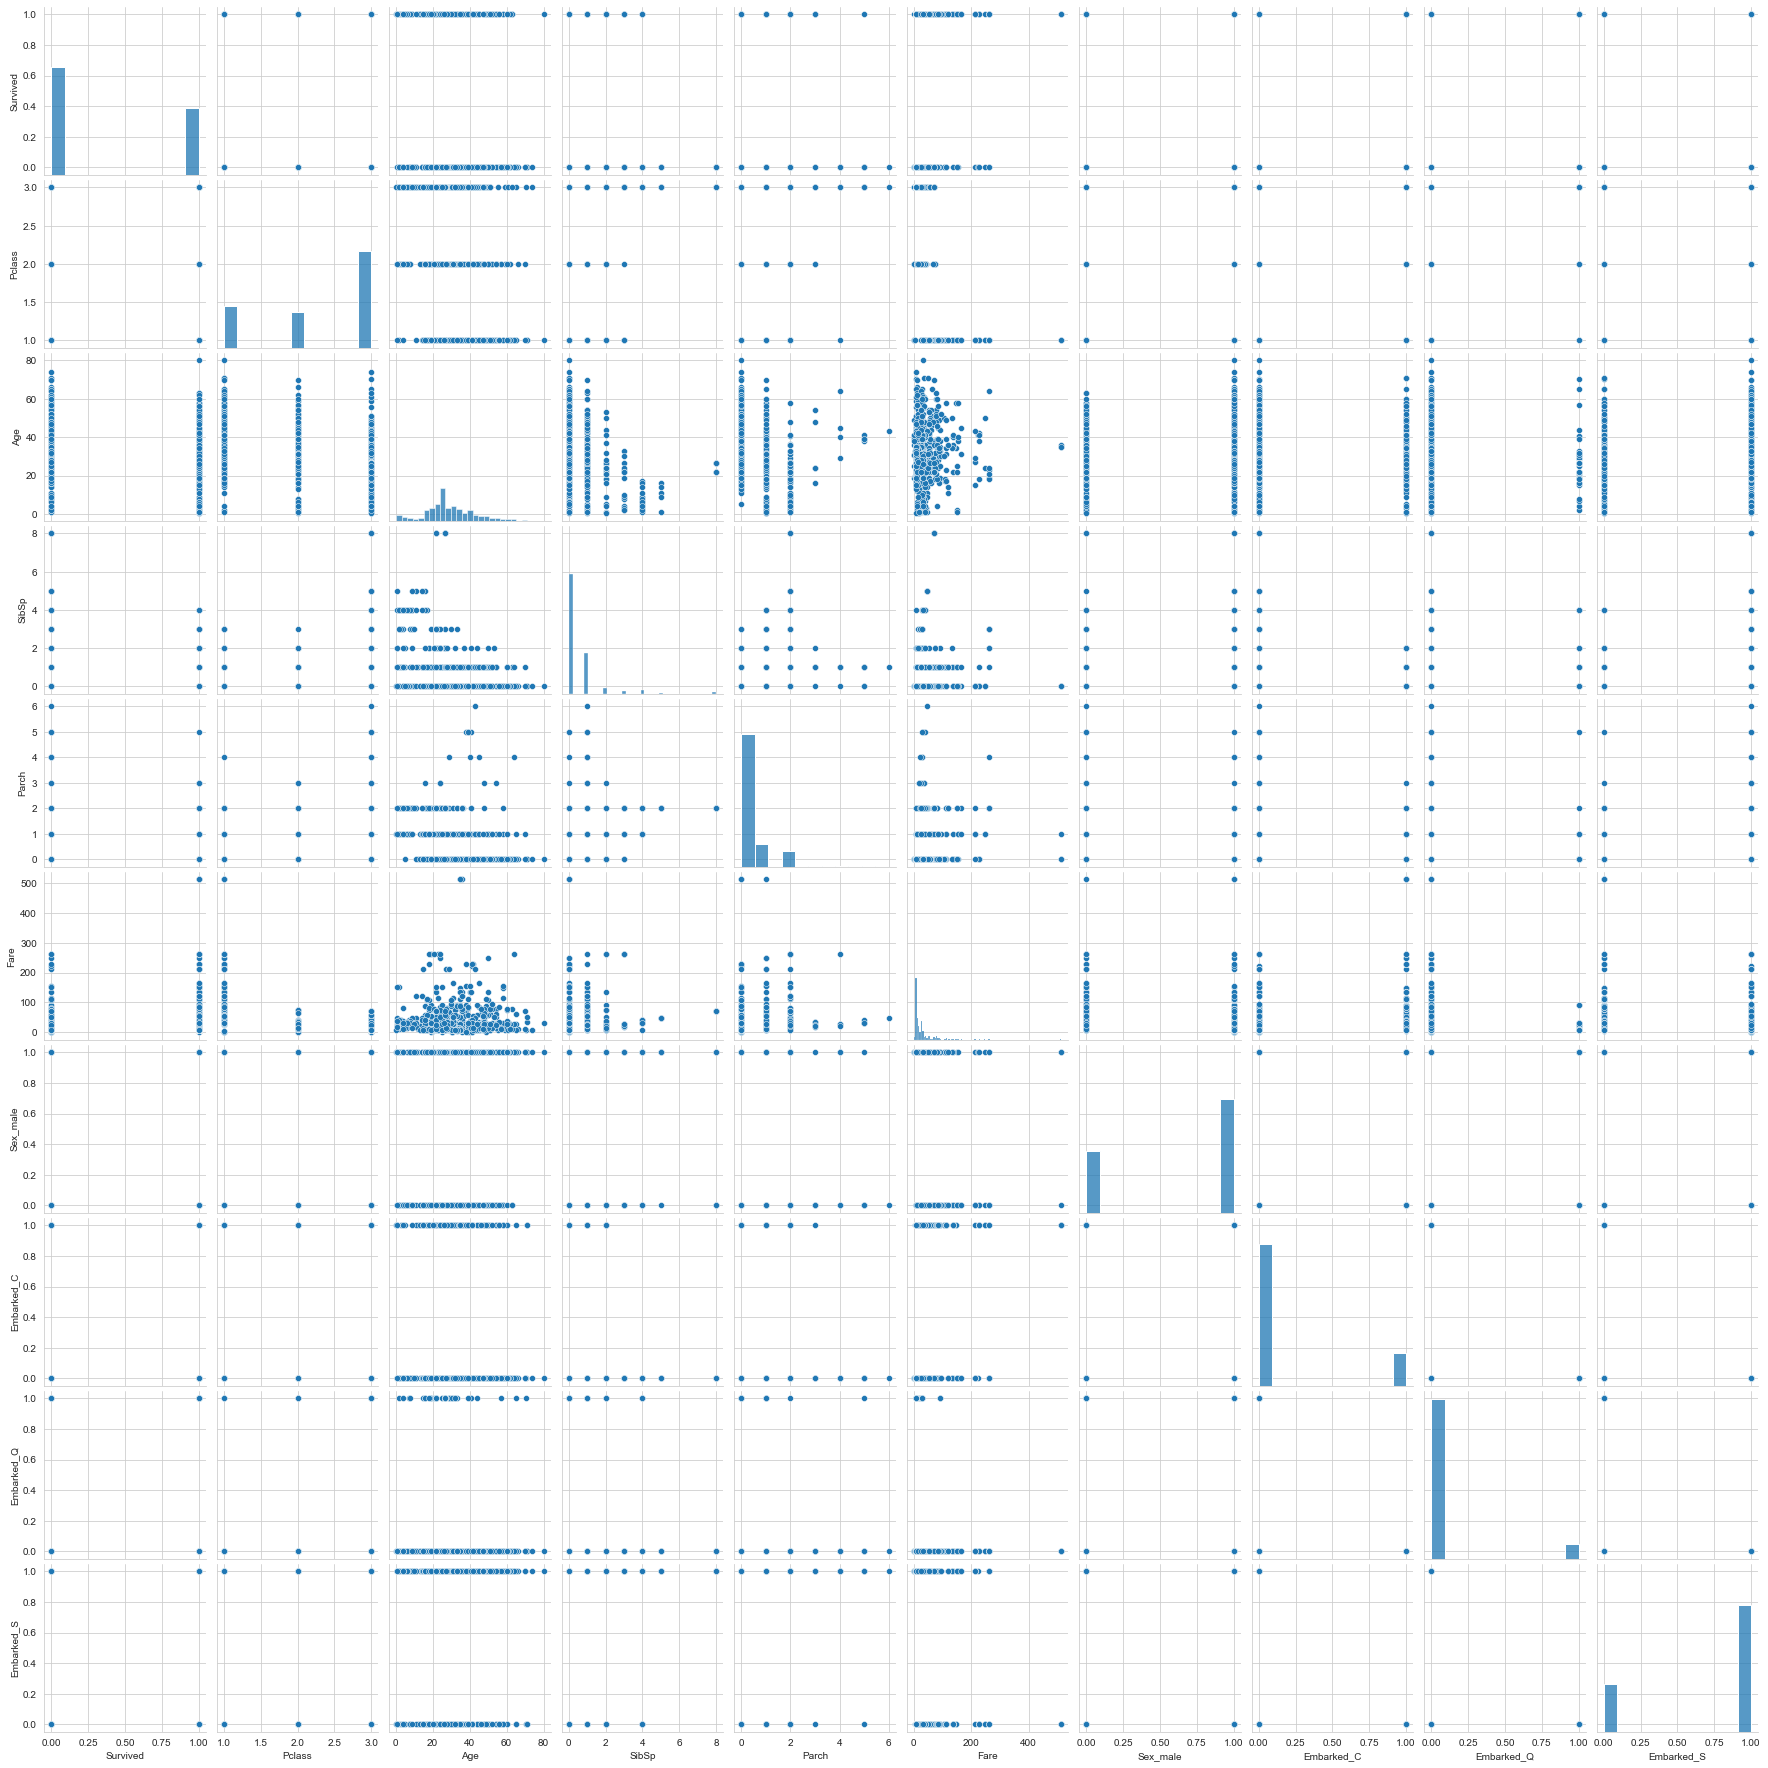

In [34]:
sns.pairplot(data)

In [35]:
target = data[target_col]
features = data.drop(target_col, axis=1)
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [36]:
features.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,1


Why we decided Logistic Regression?

Initially we thought of doing with Pairplot, but since its a categorical data in target, its not helpful
Since its binary categorical target and Features are mixtures of numerical and categorical both, then I can think of Logistic Regression (Classification)

# Machine Learning Template

## Data Splitting

In [37]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.25, random_state=101)

## Model Creation & Training

In [38]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

## from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)